In [60]:
#Importamos las bibliotecas que se van a usar

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp
from scipy.integrate import odeint


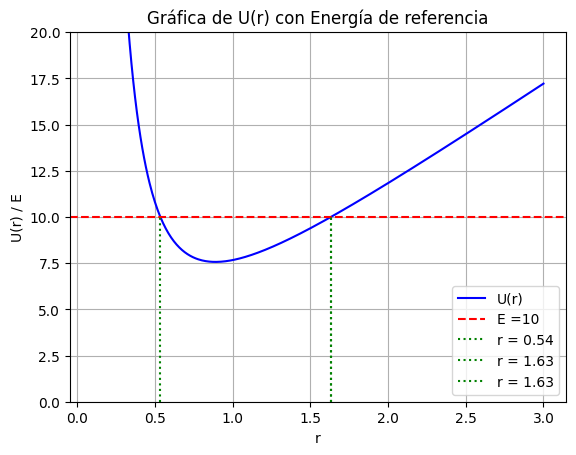

In [61]:
# Definir las constantes
l_z = 2.0 # momento angular
m = 1.0 # masa
g = 9.81 # Gravedad
theta = np.pi/3 # ángulo en radianes

# Energía mecánica total
E = 10

# Definir la función U(r)
def U(r):
    return (l_z**2 / (2*m*r**2)) + (m*g*r*np.cos(theta)/np.sin(theta))

# Definir el rango de r
r = np.linspace(0.1, 3, 500)


# Calcular U(r)
U_r = U(r)

# Definir la función para encontrar las raices de E = U(r)
def find_roots(r_guess):
    return fsolve(lambda r: U(r) - E, r_guess)

# Encontrar los puntos donde U(r) = E
r_guesses = [0.3,2,5]
r_intersections = find_roots(r_guesses)


# Crear la gráfica
plt.plot(r, U_r, label = 'U(r)', color = 'blue')
plt.axhline(y = E, color = 'red', linestyle = '--', label = f'E ={E}')


# Encontrar los puntos donde E = U(r)
# r_intersections = np.interp(E, np.sort(U_r), r[np.argsort(U_r)])


# Añadir las líneas punteadas verticales en las intersecciones
for r_int in r_intersections:
    plt.plot([r_int, r_int], [0, U(r_int)],
color = 'green', linestyle = ':',
label=f'r = {r_int:.2f}')

# Limitar el rango del eje y
plt.ylim(0,20)
# etiqueta y título
plt.xlabel('r')
plt.ylabel('U(r) / E')
plt.title('Gráfica de U(r) con Energía de referencia')
plt.legend()

# Guardar la gráfica como un archivo
plt.savefig('grafica_U_r.png',dpi=300)
# Añadir la cuadrícula
plt.grid(True)

plt.show()

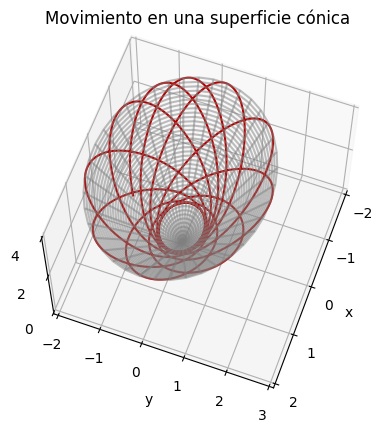

In [62]:
#SEGUNDA FIGURA

# Definimos los Parámetros del Movimiento

# Radios mínimo y máximo

r1 = 1
r2 = 4
theta = np.pi / 6  # Ángulo del cono

g = 9.8
h2 = 2 * g * r1**2 * r2**2 * np.sin(theta)**2 * np.cos(theta) / (r1 + r2)  #Cuadrado del momento angular Lz
x0 = [r1, 0, 0]  # Condiciones iniciales
tspan = np.linspace(0, 20, 1000)

# Definimos las ecuaciones diferenciales
def fg(x, t):
    return [x[1],
            h2 / (x[0]**3 * np.sin(theta)**2) - g * np.cos(theta),
            np.sqrt(h2) / (x[0]**2 * np.sin(theta)**2)]

x = odeint(fg, x0, tspan)

# Convertimos a coordenadas cartesianas
xp = x[:, 0] * np.cos(x[:, 2]) * np.sin(theta)
yp = x[:, 0] * np.sin(x[:, 2]) * np.sin(theta)
zp = x[:, 0] * np.cos(theta)

# Configuramos la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Superficie cónica
phi = np.linspace(0, 2 * np.pi, 40)
r = np.linspace(0, 4, 40)
phi, r = np.meshgrid(phi, r)
x_cone = r * np.cos(phi) * np.sin(theta)
y_cone = r * np.sin(phi) * np.sin(theta)
z_cone = r * np.cos(theta)
ax.plot_wireframe(x_cone, y_cone, z_cone, color='gray', alpha=0.5)

# Trayectoria
ax.plot(xp, yp, zp, color=[.7, 0, 0], linewidth=1.5)

# Ajuste de los ejes y límites
ax.set_xlim(-2, 2)  # Expandir límites en x y y un 50%
ax.set_ylim(-2, 2)
ax.set_zlim(0, 4)   # Expandir límite en z un 50%
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([ 3, 2, 1, 0, -1, -2])
ax.set_zticks([ 0, 2, 4])

# Configuración de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Movimiento en una superficie cónica')

# Configuración de la vista
ax.view_init(63, 20)  # Ángulo de vista ajustado

# Mostrar la gráfica
plt.grid(True)
plt.show()


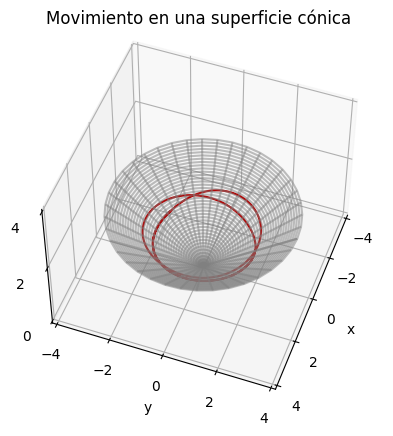

In [63]:
#TERCERA FIGURA

# Definimos los Parámetros del Movimiento

# Radios mínimo y máximo
r1 = 2
r2 = 2.5
r0 = 2.25

theta = np.pi / 3  # Ángulo del cono

w = np.sqrt(9.8 * np.cos(theta) / r0) / np.sin(theta)
W = np.sqrt(3 * 9.8 * np.cos(theta) / r0)
t = np.arange(0, 2 * np.pi * W / w, 0.01)
r = r0 + 0.25 * np.sin(W * t)
phi = w * t - 2 * (0.25 / r0) * (w / W) * np.sin(W * t)

xp = r * np.sin(phi) * np.sin(theta)
yp = r * np.cos(phi) * np.sin(theta)
zp = r * np.cos(theta)

# Configuración de la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Superficie cónica con malla uniforme
phi_cone = np.linspace(0, 2 * np.pi, 40)
r_cone = np.linspace(0, 4, 40)  # Ajuste de resolución de la malla
phi_cone, r_cone = np.meshgrid(phi_cone, r_cone)
x_cone = r_cone * np.sin(phi_cone) * np.sin(theta)
y_cone = r_cone * np.cos(phi_cone) * np.sin(theta)
z_cone = r_cone * np.cos(theta)
ax.plot_wireframe(x_cone, y_cone, z_cone, color='gray', alpha=0.5)

# Trayectoria
ax.plot(xp, yp, zp, color=[.7, 0, 0], linewidth=1.5)


# Ajuste de los ejes y límites
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 4)
ax.set_xticks([4, 2, 0, -2, -4])
ax.set_yticks([4, 2, 0, -2, -4])
ax.set_zticks([0, 2, 4])

# Configuración de la vista

ax.view_init(50, 20)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Movimiento en una superficie cónica')

plt.grid(True)
plt.show()



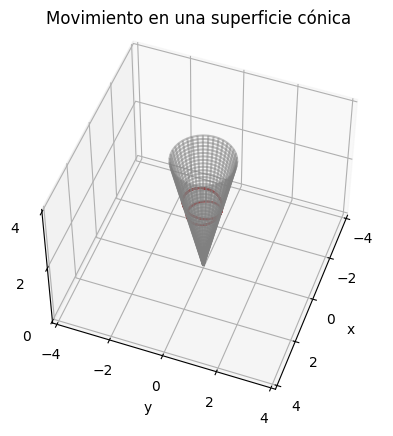

In [65]:
#Tercera Figura con Ángulo Suguerido

# Definimos los Parámetros del Movimiento

# Radios mínimo y máximo
r1 = 2
r2 = 2.5
r0 = 2.25

theta = np.arcsin(np.sqrt(3)/6)   # Ángulo del cono

w = np.sqrt(9.8 * np.cos(theta) / r0) / np.sin(theta)
W = np.sqrt(3 * 9.8 * np.cos(theta) / r0)
t = np.arange(0, 2 * np.pi * W / w, 0.01)
r = r0 + 0.25 * np.sin(W * t)
phi = w * t - 2 * (0.25 / r0) * (w / W) * np.sin(W * t)

xp = r * np.sin(phi) * np.sin(theta)
yp = r * np.cos(phi) * np.sin(theta)
zp = r * np.cos(theta)

# Configuración de la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Superficie cónica con malla uniforme
phi_cone = np.linspace(0, 2 * np.pi, 40)
r_cone = np.linspace(0, 4, 40)  # Ajuste de resolución de la malla
phi_cone, r_cone = np.meshgrid(phi_cone, r_cone)
x_cone = r_cone * np.sin(phi_cone) * np.sin(theta)
y_cone = r_cone * np.cos(phi_cone) * np.sin(theta)
z_cone = r_cone * np.cos(theta)
ax.plot_wireframe(x_cone, y_cone, z_cone, color='gray', alpha=0.5)

# Trayectoria
ax.plot(xp, yp, zp, color=[.7, 0, 0], linewidth=1.5)


# Ajuste de los ejes y límites
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 4)
ax.set_xticks([4, 2, 0, -2, -4])
ax.set_yticks([4, 2, 0, -2, -4])
ax.set_zticks([0, 2, 4])

# Configuración de la vista

ax.view_init(50, 20)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Movimiento en una superficie cónica')

plt.grid(True)
plt.show()
